In [56]:
#Import statements
import hashlib as hasher 
import random as rand
import time 
import datetime as date
import ipyparallel as ipp
import numpy as np
import matplotlib.pyplot as plt
from hashlib import sha256
import datetime;

In [63]:
class Block:
    def __init__(self, index, timestamp, data, previous_hash, nonce=0):
        self.index = index
        self.timestamp = timestamp
        self.data = data
        self.nonce = nonce #set to zero as default not applicable in first section 
        self.previous_hash = previous_hash
        self.hash = self.hash_block()

    def hash_block(self):
        if isinstance(self.timestamp, datetime.datetime):
            time = self.timestamp.strftime("%d-%b-%Y %H:%M:%S.%f")
        else:
            time = self.timestamp
        to_hash = str(self.index) + time + self.data + self.previous_hash + str(self.nonce)
        hash_string = sha256(to_hash.encode('utf-8')).hexdigest()
        return hash_string

In [64]:
def test_question_1(index, time, data, previous_hash):
    new_block = Block(index, time, data, previous_hash)
    check_string = '2def27922fc1c67254a9cdb0c660b91abf9b135ad38fc13c7c77007448b824a0'
    print_statement = "PASSED!!! Move on to next Question" if str(new_block.hash) == check_string else "FAILED!!! Try Again"
    print(print_statement)
    
time = '2019-10-17 00:37:35.256774'
data = 'Machine Learning Blockchain AI'
previous_hash = '6ffd1464f68ef4aeb385d399244efa19293ba5c842c464a82c02f8256ef71428'
index = 0
    
test_question_1(index, time, data, previous_hash)

PASSED!!! Move on to next Question


In [65]:
#Creates the first block with current time and generic data
def create_genesis_block():
    # Manually construct a block with
    # index zero and arbitrary previous hash
    return Block(0, date.datetime.now().strftime("%d-%b-%Y %H:%M:%S.%f"), "Genesis Block", "0")

#Function that creates the next block, given the last block on the chain you want to mine on
def next_block(last_block, nonce=0):
    index = last_block.index + 1
    timestamp = datetime.datetime.now()
    data = "Hey! I'm block " + str(index)
    previous_hash = last_block.hash
    return Block(index, timestamp, data, previous_hash)

In [66]:
def test_question_2(genesis_block):
    block_1 = next_block(genesis_block)
    if block_1.index == 1 and block_1.data == "Hey! I'm block 1" and block_1.previous_hash == genesis_block.hash and str(type(block_1.timestamp)) == "<class 'datetime.datetime'>":
        print("PASSED!!! Move on to next part" )
    else:
        print("FAILED!!! Try again :(")
    

genesis_block = create_genesis_block()
test_question_2(genesis_block)

PASSED!!! Move on to next part


In [67]:
# Create the blockchain and add the genesis block
blockchain = [create_genesis_block()]

#Create our initial reference to previous block which points to the genesis block
previous_block = blockchain[0]

# How many blocks should we add to the chain after the genesis block
num_blocks = 20

def complete_chain(num_blocks, blockchain, previous_block):
    # Add blocks to the chain
    for i in range(0, num_blocks):
        block_to_add = next_block(previous_block)
        blockchain.append(block_to_add)
        previous_block = block_to_add
        
        # Tell everyone about it!
        print("Block #{} has been added to the blockchain!".format(block_to_add.index))
        print("Hash: {}\n".format(block_to_add.hash))

complete_chain(num_blocks, blockchain, previous_block)

Block #1 has been added to the blockchain!
Hash: 240ed5ac958e61ea8a43c8187f598ca4674f9b2ae48513ca8c4ac03709005d59

Block #2 has been added to the blockchain!
Hash: 2c83c823befcc137857c530ca0738ee052e8ec0cb7af563dcb17149af55851fc

Block #3 has been added to the blockchain!
Hash: 4594bc0f79d8dd70aff7d3b5925c62b9a28a3db808c9dbaa9f3ca80710060a82

Block #4 has been added to the blockchain!
Hash: a03a4fe56665a7efe8e64fdbed7738abedf24a14655d12fdc177fa5320103a26

Block #5 has been added to the blockchain!
Hash: 620c5dd2cbc2fedc8458ce6785249896b9836f7349bad3b4fba1fdaf80f6290a

Block #6 has been added to the blockchain!
Hash: 93da1bed41cc7fc8a32336b92564e4c3e437fb92e9aa1d6bf13849439658850e

Block #7 has been added to the blockchain!
Hash: 80a6279638ded3be9fc990ff29d4a72747b979c731c647c199ec3bd5eb20edb3

Block #8 has been added to the blockchain!
Hash: 90f8cf5f2f1c8aa0292a06f42d8ce540c6f21d3b01fcede9aef8a5a2407ac0e9

Block #9 has been added to the blockchain!
Hash: 1f5a17e7295a4aaf5048bcd22b32f9e

In [69]:
def test_question_3(blockchain, num_blocks):
    correct = True
    if len(blockchain) != num_blocks + 1:
        correct = False
    for i in range(len(blockchain)-1):
        if blockchain[i + 1].previous_hash != blockchain[i].hash:
            correct = False
            break
    print_statement = "PASSED!!! Move on to the next Part" if correct else "FAILED!!! Try Again :("
    print(print_statement)

test_question_3(blockchain, num_blocks)

PASSED!!! Move on to the next Part


In [100]:
import time

#Creates a random number with 'length' digits
def generate_nonce(length=20):
    return ''.join([str(rand.randint(0, 9)) for i in range(length)])

#Sets magnitude of difficulty of hash - number of zeros that must be in the beginning of the hash
def generate_difficulty_bound(difficulty=1):
    diff_str = ""
    for i in range(difficulty):
        diff_str += '0'
    for i in range(64 - difficulty):
        diff_str += 'F'
    diff_str = "0x" + diff_str  # "0x" needs to be added at the front to specify that it is a hex representation
    return(int(diff_str, 16))  # Specifies that we want to create an integer of base 16 (as opposed to the default base 10)

#Given a previous block and a difficulty metric, finds a nonce that results in a lower hash value
def find_next_block(last_block, difficulty, nonce_length):
    difficulty_bound = generate_difficulty_bound(difficulty)
    start = time.process_time() 
    new_block = next_block(last_block)
    hashes_tried = 1
    
    nonce = generate_nonce(nonce_length)

    while int(new_block.hash, 16) > difficulty_bound: 
        hashes_tried += 1
        new_block = next_block(last_block, int(nonce))
        nonce = generate_nonce(nonce_length)
         
    time_taken = time.process_time() - start
    return(time_taken, hashes_tried, new_block)

In [101]:
# Create the blockchain and add the genesis block
blockchain_pow = [create_genesis_block()]

#Create our initial reference to previous block which points to the genesis block
previous_block = blockchain_pow[0]

# How many blocks should we add to the chain after genesis block
num_blocks = 20

#magnitude of difficulty of hash - number of zeroes that must be in the beginning of the hash
difficulty = 3

#length of nonce that will be generated and added
nonce_length = 20

# Add blocks to the chain based on difficulty with nonces of length nonce_length
def create_pow_blockchain(num_blocks, difficulty, blockchain_pow, previous_block, nonce_length, print_data=1):
    hash_array = []
    time_array = []
    for i in range(0, num_blocks):          
        time_taken, hashes_tried, block_to_add = find_next_block(previous_block, difficulty, nonce_length)
        blockchain_pow.append(block_to_add)
        previous_block = block_to_add
        hash_array.append(hashes_tried)
        time_array.append(time_taken)
        # Tell everyone about it!
        if print_data:
            print("Block #{} has been added to the blockchain!".format(block_to_add.index))
            print("{} Hashes Tried!".format(hashes_tried))
            print("Time taken to find block: {}".format(time_taken))
            print("Hash: {}\n".format(block_to_add.hash))
    return(hash_array, time_array)

hash_array, time_array = create_pow_blockchain(num_blocks, difficulty, blockchain_pow, previous_block, nonce_length)

Block #1 has been added to the blockchain!
90825 Hashes Tried!
Time taken to find block: 4.046875
Hash: 000092a9f7733272eda5bc7f18847f255994a2852b48def54feeb4b945046c0d

Block #2 has been added to the blockchain!
168154 Hashes Tried!
Time taken to find block: 7.234375
Hash: 000d1d287c525bb9a9aba3c7fbca518fe95951eff7dbba1c8e19da48d02bd49c

Block #3 has been added to the blockchain!
79517 Hashes Tried!
Time taken to find block: 3.375
Hash: 000f80c6919ce1be06c412bbf29bea1062238f74a9bb626aa841f0c2f309d545

Block #4 has been added to the blockchain!
132712 Hashes Tried!
Time taken to find block: 5.5625
Hash: 00022e1a9f0d8829f2f60f5c53b41ec2152b8c928421d0961b0689e3ad38e813

Block #5 has been added to the blockchain!
65070 Hashes Tried!
Time taken to find block: 2.765625
Hash: 00068f09691a96b18eb3ca9288d03d3f1a0a1666938d95366cea6e9011993828

Block #6 has been added to the blockchain!
53973 Hashes Tried!
Time taken to find block: 2.25
Hash: 00082f0f397455ee371dd099e305b43ecb48d0d33349cd8158b88

In [102]:
def test_question_4(blockchain_pow, num_blocks):
    correct = True
    bound = generate_difficulty_bound(difficulty)
    if len(blockchain_pow) != num_blocks + 1:
        correct = False
    for i in range(len(blockchain_pow) - 1):
        if blockchain_pow[i + 1].previous_hash != blockchain_pow[i].hash:
            correct = False
            break
        if int(blockchain_pow[i + 1].hash, 16) > bound:
            correct = False
            break
    print_statement = "PASSED!!! Move on to the next Part" if correct else "FAILED!!! Try Again :("
    print(print_statement)
            
test_question_4(blockchain_pow, num_blocks)

PASSED!!! Move on to the next Part


In [103]:
#Naive miner class that races with other miners to see who can get a certain number of blocks first 
class MinerNodeNaive: 
    def __init__(self, name, compute):
        self.name = name 
        self.compute = compute
    
    def try_hash(self, diff_value, chain):
        last_block = chain[-1]
        difficulty = generate_difficulty_bound(diff_value)
        date_now = date.datetime.now()
        this_index = last_block.index + 1
        this_timestamp = date_now
        this_data = "Hey! I'm block " + str(this_index)
        this_hash = last_block.hash
        new_block = Block(this_index, this_timestamp, this_data, this_hash)
        if int(new_block.hash, 16) < difficulty:
            chain.append(new_block)
            # Tell everyone about it!
            print("Block #{} has been added to the blockchain!".format(new_block.index))
            print("Block found by: {}".format(self.name))
            print("Hash: {}\n".format(new_block.hash))

In [104]:
#Initialize multiple miners on the network 
berkeley_Miner = MinerNodeNaive("Berkeley Miner", 10)
stanford_Miner = MinerNodeNaive("Stanford Miner", 5)
MIT_Miner = MinerNodeNaive("MIT Miner", 2)
UCLA_Miner = MinerNodeNaive("UCLA Miner", 1)

miner_array = [berkeley_Miner, stanford_Miner, MIT_Miner, UCLA_Miner]

In [105]:
def create_compute_simulation(miner_array):
    compute_array = []
    for miner in miner_array:
        for i in range(miner.compute):
            compute_array.append(miner.name)
    return(compute_array)

compute_simulation_array = create_compute_simulation(miner_array)
rand.shuffle(compute_simulation_array)

In [106]:
chain_length = 20
blockchain_distributed = [create_genesis_block()]
genesis_block_dist = blockchain_distributed[0]
chain_difficulty = [rand.randint(2,4) for i in range(chain_length)]

In [107]:
for i in range(len(chain_difficulty)): 
    while len(blockchain_distributed) < i + 2:
        next_miner_str = rand.sample(compute_simulation_array, 1)[0] 
        next_miner = berkeley_Miner #random default (go bears)
        for miner in miner_array:
            if next_miner_str == miner.name:
                next_miner = miner
        next_miner.try_hash(chain_difficulty[i], blockchain_distributed)

Block #1 has been added to the blockchain!
Block found by: Stanford Miner
Hash: 00d04f21a9da881fba67c6bb32b0f51d554539280b243c04acb171bf02e9ff0c

Block #2 has been added to the blockchain!
Block found by: Berkeley Miner
Hash: 007c2877890c53a56c01fe1a998c6a2565bc7d29b2cd0080b890e3d203973ea0

Block #3 has been added to the blockchain!
Block found by: Stanford Miner
Hash: 00d192ccb1a80e205b610f3f090483a1e1f3117d96ed0d79a7432502dcf43c85

Block #4 has been added to the blockchain!
Block found by: Berkeley Miner
Hash: 000dac73ec6e1c94d2f63ec2775c6ed641f67c4c50489849fd2cc8ed6efd0b29

Block #5 has been added to the blockchain!
Block found by: Stanford Miner
Hash: 002ba2c7b01fbb9d5a327a05b86a21ffd14e0d4886d541498afe002c549bb340

Block #6 has been added to the blockchain!
Block found by: Berkeley Miner
Hash: 000c1f2b75df2101a390d74f2735bcb30a9c958edf851c12dd06ae86c8951a98

Block #7 has been added to the blockchain!
Block found by: MIT Miner
Hash: 004b6c717ec14a1a939958f8b30a890dda36c718a96be1d09

KeyboardInterrupt: 

In [108]:
blockchain = [create_genesis_block()]
previous_block = blockchain[0]
num_blocks = 10

#3 different types of difficulty to analyze
difficulty_0 = 1
difficulty_1 = 2
difficulty_2 = 3
difficulty_3 = 4

nonce_length = 20

hash_array_0, time_array_0 = create_pow_blockchain(num_blocks, difficulty_0, blockchain, previous_block, nonce_length, 0)
print("Difficulty Level: {} complete".format(difficulty_0))
hash_array_1, time_array_1 = create_pow_blockchain(num_blocks, difficulty_1, blockchain, previous_block, nonce_length, 0)
print("Difficulty Level: {} complete".format(difficulty_1))
hash_array_2, time_array_2 = create_pow_blockchain(num_blocks, difficulty_2, blockchain, previous_block, nonce_length, 0)
print("Difficulty Level: {} complete".format(difficulty_2))
hash_array_3, time_array_3 = create_pow_blockchain(num_blocks, difficulty_3, blockchain, previous_block, nonce_length, 0)
print("Difficulty Level: {} complete".format(difficulty_3))

Difficulty Level: 1 complete
Difficulty Level: 2 complete
Difficulty Level: 3 complete
Difficulty Level: 4 complete


In [109]:
mean_arr_hash = [np.mean(hash_array_0), np.mean(hash_array_1), np.mean(hash_array_2), np.mean(hash_array_3)]
mean_arr_time = [np.mean(time_array_0), np.mean(time_array_1), np.mean(time_array_2), np.mean(time_array_3)]

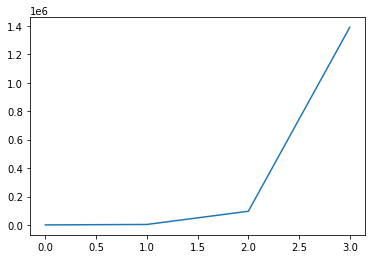

In [111]:
plt.plot(mean_arr_hash)
plt.show()

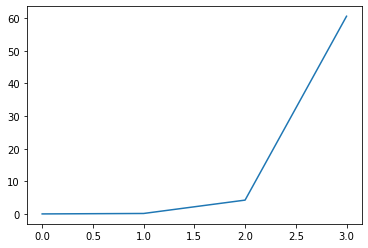

In [110]:
plt.plot(mean_arr_time)
plt.show()

In [112]:
diff_factor_1 = np.mean(hash_array_1)/np.mean(hash_array_0)
diff_factor_2 = np.mean(hash_array_2)/np.mean(hash_array_1)
diff_factor_3 = np.mean(hash_array_3)/np.mean(hash_array_2)
print("Factor of difficulty increase from 1 to 2: {}".format(diff_factor_1))
print("Factor of difficulty increase from 2 to 3: {}".format(diff_factor_2))
print("Factor of difficulty increase from 3 to 4: {}".format(diff_factor_3))

Factor of difficulty increase from 1 to 2: 15.475342465753425
Factor of difficulty increase from 2 to 3: 28.41220382992535
Factor of difficulty increase from 3 to 4: 14.439316743481792
